#**Analyzing Global Happiness:** A Data-Driven Approach to Understanding Contributing Factors



* **Course:** CS661 73544 Python Programming
*   **Instructor:** Prof. Kshitij Sharma
*   **Group-3:** Bushra Anika, Lantz Eric, Mohammed Abdul Munaf, Vemula Deepak
*   **Semester:** Fall 2024
* **Due Date:** 12 December, 2024






##**Step 1: Data Understanding and Preparation**

##**1.1 Data Overview**
- Load the dataset and explore its initial rows to understand its structure.
- Check data types of all features.
- Identify missing values to determine necessary data cleaning.

In [52]:
import pandas as pd
data= pd.read_csv("world-happiness-report-2021.csv")

In [ ]:
# Display the first few rows to understand dataset structure
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
# Data types of each column
print("\nData Types of Each Column:")
print(data.dtypes)


Data Types of Each Column:
Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64


In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: i

##**1.2 Data Cleaning**
 - Since there are no missing values in the dataset, we can skip the missing values handling step.

- However, we'll still proceed with feature engineering and ensure all features are properly formatted.



##**1.3 Feature engineering**
- Create a new feature to categorize countries into low, medium, and high GDP levels.
- Bin life expectancy into ranges to categorize population health levels.
- Convert categorical columns (like regional indicators) into dummy variables for better analysis by ML models.

In [ ]:
# Create a new feature for GDP levels
gdp_bins = [0, 9, 10, 12]  # Define GDP bins for low, medium, and high
gdp_labels = ['Low', 'Medium', 'High']
data['GDP_Level'] = pd.cut(data['Logged GDP per capita'], bins=gdp_bins, labels=gdp_labels)


In [ ]:
# Create a new feature for life expectancy range
life_expectancy_bins = [0, 60, 70, 80, 100]
life_expectancy_labels = ['Low', 'Moderate', 'High', 'Very High']
data['Life_Expectancy_Range'] = pd.cut(data['Healthy life expectancy'], bins=life_expectancy_bins, labels=life_expectancy_labels)

In [ ]:
# Convert categorical variables into dummy variables
data_with_dummies = pd.get_dummies(data, columns=['Regional indicator'])

# Display the updated dataset
# Display the updated dataset
print("Processed World Happiness Dataset (first 5 rows):")
print(data_with_dummies.head())

# Alternatively, to save the dataset to a CSV file for further use:
data_with_dummies.to_csv('processed_world_happiness_dataset.csv', index=False)

Processed World Happiness Dataset (first 5 rows):
  Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.842                           0.032         7.904   
1      Denmark         7.620                           0.035         7.687   
2  Switzerland         7.571                           0.036         7.643   
3      Iceland         7.554                           0.059         7.670   
4  Netherlands         7.464                           0.027         7.518   

   lowerwhisker  Logged GDP per capita  Social support  \
0         7.780                 10.775           0.954   
1         7.552                 10.933           0.954   
2         7.500                 11.117           0.942   
3         7.438                 10.878           0.983   
4         7.410                 10.932           0.942   

   Healthy life expectancy  Freedom to make life choices  Generosity  ...  \
0                     72.0                         0.94

##**Step 2: Exploratory Data Analysis**

##**2.1 Descriptive Statistics**
- Summarize key statistics (e.g., mean, median, min, max) for the numerical features.
- Compare basic descriptive metrics across different regions.

In [ ]:
print("Descriptive Statistics for Numerical Features:")
data.describe()

Descriptive Statistics for Numerical Features:


,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [ ]:
# Regional summary (group by Regional Indicator to observe key stats)
regional_summary = data.groupby('Regional indicator').agg({
    'Ladder score': ['mean', 'median', 'std'],
    'Logged GDP per capita': ['mean', 'median', 'std'],
    'Healthy life expectancy': ['mean', 'median', 'std']
})
print("\nRegional Summary Statistics:")
regional_summary


Regional Summary Statistics:


Ladder score                    \
                                           mean  median       std   
Regional indicator                                                  
Central and Eastern Europe             5.984765  6.0780  0.493325   
Commonwealth of Independent States     5.467000  5.4715  0.438116   
East Asia                              5.810333  5.7610  0.439913   
Latin America and Caribbean            5.908050  5.9920  0.693467   
Middle East and North Africa           5.219765  4.8870  0.999259   
North America and ANZ                  7.128500  7.1430  0.138057   
South Asia                             4.441857  4.9340  0.993462   
Southeast Asia                         5.407556  5.3840  0.606271   
Sub-Saharan Africa                     4.494472  4.6160  0.654892   
Western Europe                         6.914905  7.0850  0.656519   

                                   Logged GDP per capita                     \
                                                    mean   median       std   
Regional indicator                                                            
Central and Eastern Europe                     10.109059  10.2840  0.396190   
Commonwealth of Independent States              9.401833   9.5280  0.625180   
East Asia                                      10.367667  10.6310  0.665074   
Latin America and Caribbean                     9.370000   9.4530  0.650216   
Middle East and North Africa                    9.666118   9.5840  0.927938   
North America and ANZ                          10.809500  10.7860  0.157701   
South Asia                                      8.682571   8.4580  0.744668   
Southeast Asia                                  9.421444   9.0760  0.970509   
Sub-Saharan Africa                              8.075194   7.9345  0.802880   
Western Europe                                 10.822714  10.8230  0.305056   

                                   Healthy life expectancy                     
                                                      mean   median       std  
Regional indicator                                                             
Central and Eastern Europe                       68.338412  68.6000  1.909003  
Commonwealth of Independent States               65.009500  65.0510  1.167467  
East Asia                                        71.252167  71.7500  5.194238  
Latin America and Caribbean                      67.076050  67.5785  3.219192  
Middle East and North Africa                     65.609118  66.6030  3.763673  
North America and ANZ                            72.325000  73.6000  2.758472  
South Asia                                       62.681000  64.2330  5.981942  
Southeast Asia                                   64.888444  62.2360  5.663948  
Sub-Saharan Africa                               55.886472  56.1510  3.835694  
Western Europe                                   73.033095  72.7000  0.788080



###**Key Points of Interpretation (Based on our statistics):**

- **Ladder Score:**
  - Average happiness score is **5.53**, showing moderate global happiness levels.
  - Happiness scores vary significantly (**std = 1.07**), indicating disparities between countries.
  - Happiness ranges from **2.52** (least happy) to **7.84** (most happy).

- **Logged GDP per Capita:**
  - The average is **9.43**, suggesting good economic prosperity when considering a log-transformed scale.
  - Large disparities exist among countries (**std = 1.15**).

- **Healthy Life Expectancy:**
  - Average healthy life expectancy is **64.99 years**.
  - The range from **48.48 to 76.95** indicates notable healthcare disparities globally.

- **Social Support:**
  - Consistent support across countries (**mean = 0.81**, **std = 0.11**), indicating a relatively similar perception of available social support.

- **Regional Disparities:**
  - **Western Europe** and **North America & ANZ** regions generally have higher **Ladder Scores** and **Life Expectancy**.
  - **Sub-Saharan Africa** and **South Asia** have lower **Ladder Scores**, lower **GDP per Capita**, and **life expectancy**, reflecting economic and healthcare challenges.

These observations guide the focus for further analysis, emphasizing how regional, economic, and social factors impact happiness.


##**2.2 Univariate Analysis**
- The purpose is to visualize the distribution of key features.
- Focus on features like Ladder Score, GDP per Capita, and Healthy Life Expectancy to identify trends and outliers.

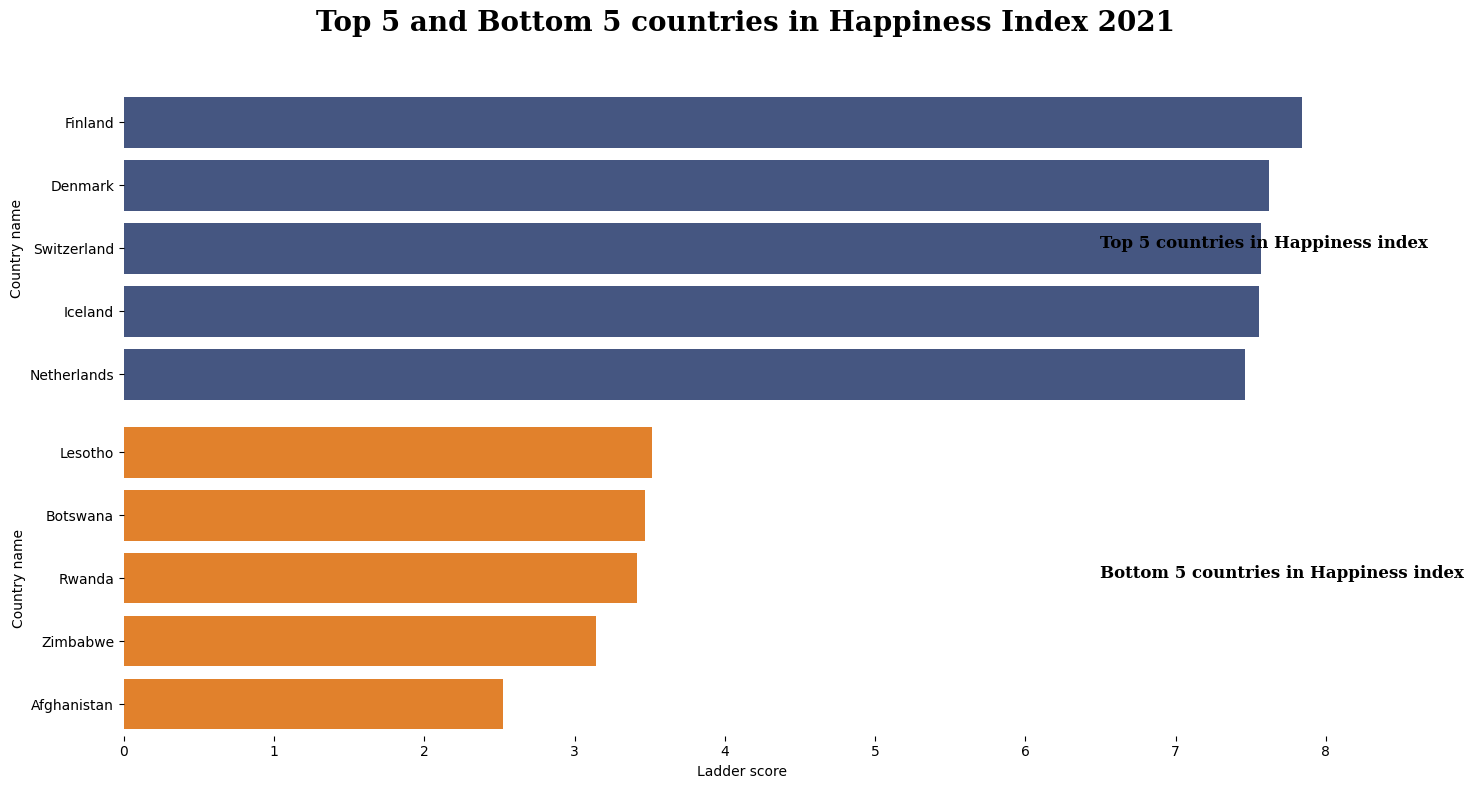

In [53]:
#Top 5 and Bottom 5 countries in Happiness Index 2021
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

# Colors to be used in the plots
top_color = "#3b528b"  # Dark Blue for top countries
bottom_color = "#ff7f0e"  # Orange for bottom countries

# Prepare the figure
fig = plt.figure(figsize=(15, 8))
g = gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 and Bottom 5 countries in Happiness Index 2021", family='Serif', weight='bold', size=20)

# Top 5 countries in Happiness Index
top_5 = data.head(5)
ax1 = plt.subplot(g[0, 0])
sns.barplot(data=top_5, x='Ladder score', y='Country name', color=top_color)
ax1.xaxis.set_visible(False)
ax1.annotate("Top 5 countries in Happiness index", xy=(6.5, 2), family='Serif', weight='bold', size=12)

# Bottom 5 countries in Happiness Index
bottom_5 = data.tail(5)
ax2 = plt.subplot(g[1, 0], sharex=ax1)
sns.barplot(data=bottom_5, x='Ladder score', y='Country name', color=bottom_color)
ax2.annotate("Bottom 5 countries in Happiness index", xy=(6.5, 2), family='Serif', weight='bold', size=12)

# Remove borders and adjust plot aesthetics
for ax in [ax1, ax2]:
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Bar plot Interpretation**
- **Top 5 Countries**:
  - The countries at the top of the **Happiness Index 2021** are **Finland, Denmark, Switzerland, Iceland, and Netherlands**, indicating that these countries have the highest happiness scores globally.
  - The happiness levels of these countries are relatively high and close, with **Finland** having the highest **Ladder Score**.
- **Bottom 5 Countries**:
  - The lowest-ranked countries are **Lesotho, Botswana, Rwanda, Zimbabwe, and Afghanistan**, with **Afghanistan** having the lowest **Ladder Score**.
  - The scores of these countries are significantly lower, indicating that citizens perceive themselves to be living closer to their "worst possible life".



<ipython-input-54-6f61c2702fd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data, x='Ladder score', y='Regional indicator', palette='muted')


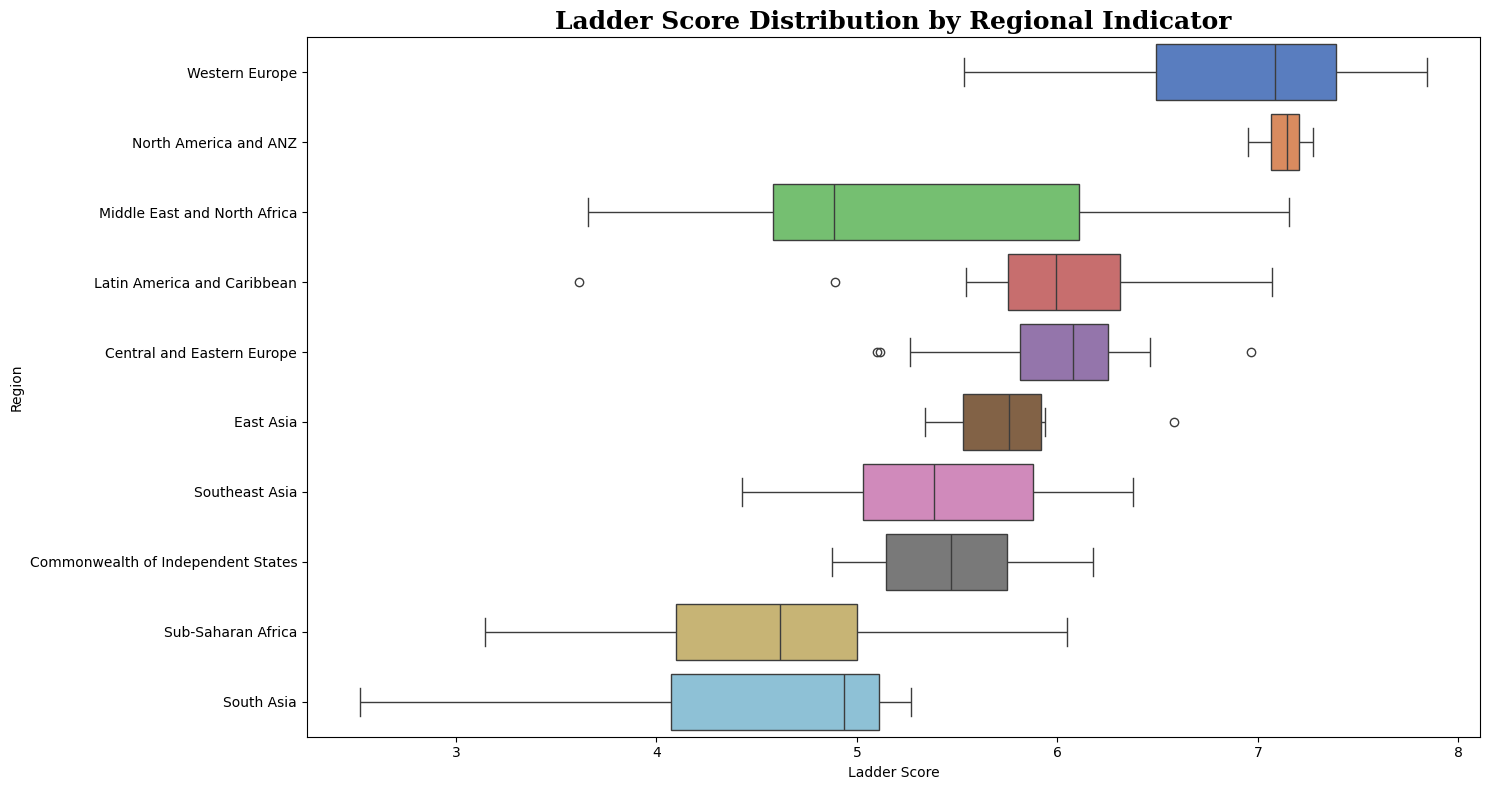

In [54]:
# Boxplot of Ladder Score by Regional Indicator
plt.figure(figsize=(15, 8))
sns.boxplot(data= data, x='Ladder score', y='Regional indicator', palette='muted')
plt.title("Ladder Score Distribution by Regional Indicator", fontsize=18, weight='bold', family='Serif')
plt.xlabel("Ladder Score")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

**Box plot Interpretation**

1. **Western Europe** and **North America & ANZ** have the **highest median happiness scores** with **low variability**, indicating consistently high well-being across these regions.
2. **South Asia** and **Sub-Saharan Africa** have the **lowest median scores**, with Sub-Saharan Africa showing **high variability**, indicating significant disparities in happiness within the region.
3. **Middle East & North Africa** and **Latin America & Caribbean** exhibit **moderate median scores** but **high variability**, suggesting disparities in happiness levels across countries.
4. **East Asia** has a **low median** and **narrow IQR**, indicating consistently lower but similar happiness scores across countries in this region.

These points highlight the major regional disparities in happiness, with Western regions performing much better compared to South Asia and Sub-Saharan Africa.


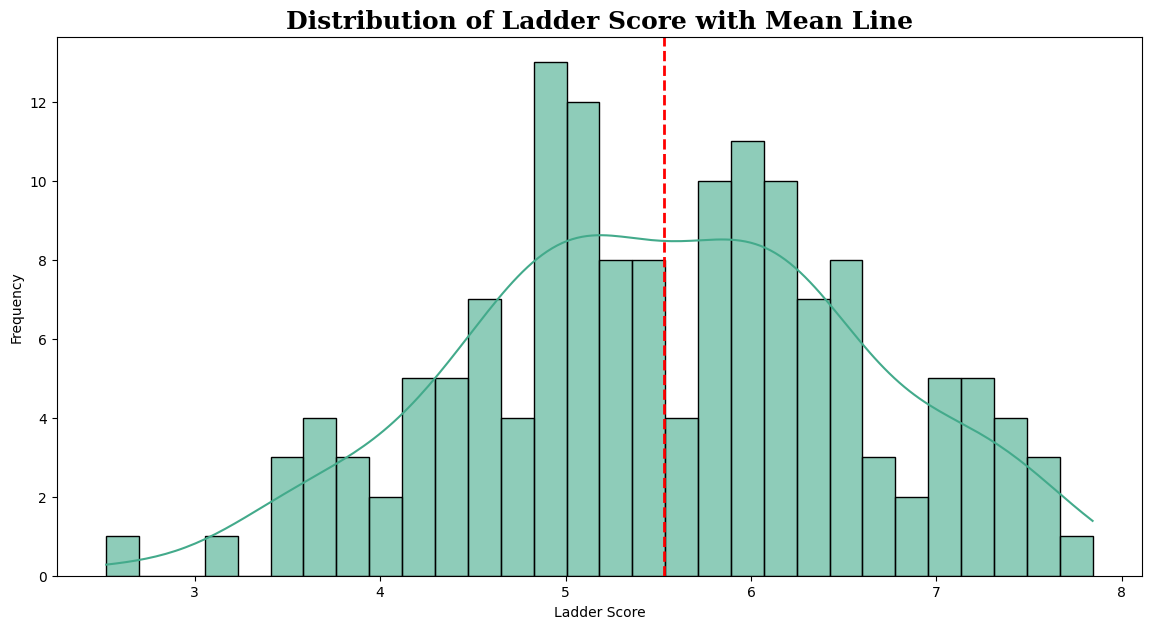

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of Ladder Score (Histogram with KDE)
plt.figure(figsize=(14, 7))
sns.histplot(data['Ladder score'], kde=True, color="#43aa8b", bins=30, alpha=0.6)
plt.axvline(data['Ladder score'].mean(), color='red', linestyle='--', linewidth=2)
plt.title("Distribution of Ladder Score with Mean Line", fontsize=18, weight='bold', family='Serif')
plt.xlabel("Ladder Score")
plt.ylabel("Frequency")
plt.show()

**Historgram Interpretation**
- The **distribution** of **Ladder Scores** is approximately **normal**, but slightly skewed to the right.
- Most countries have scores between **4 and 6**, which indicates a moderate level of happiness for many nations.
- The **red dashed line** represents the mean ladder score (**5.53**), indicating that a substantial number of countries score slightly above or below the average.
- There are a few countries with extremely low scores (around **2-3**) and some with high scores (**6-8**), showing that happiness levels vary greatly among countries.





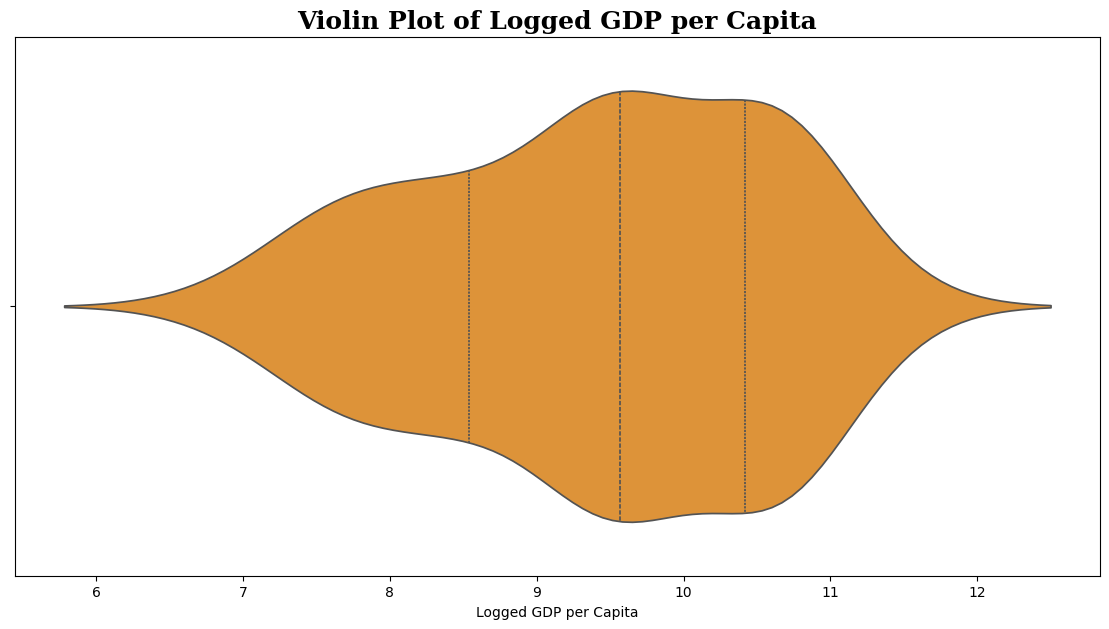

In [ ]:
# Violin Plot for GDP per Capita
plt.figure(figsize=(14, 7))
sns.violinplot(data=data, x='Logged GDP per capita', color="#f8961e", inner="quartile")
plt.title("Violin Plot of Logged GDP per Capita", fontsize=18, weight='bold', family='Serif')
plt.xlabel("Logged GDP per Capita")
plt.show()

**Violin Plot Interpretaion**
- The **violin plot** provides an overview of the distribution of **GDP per Capita** (log-transformed).
- The plot indicates that the **median GDP per Capita** lies around **9-10** on the log-transformed scale, with significant **variability** on either side.
- The **thicker section** of the violin in the middle indicates that many countries fall around this median level, while **longer tails** show that a few countries have extreme GDP levels (either very high or very low).
- **Economic disparities** are evident, with notable **outliers** on both ends.






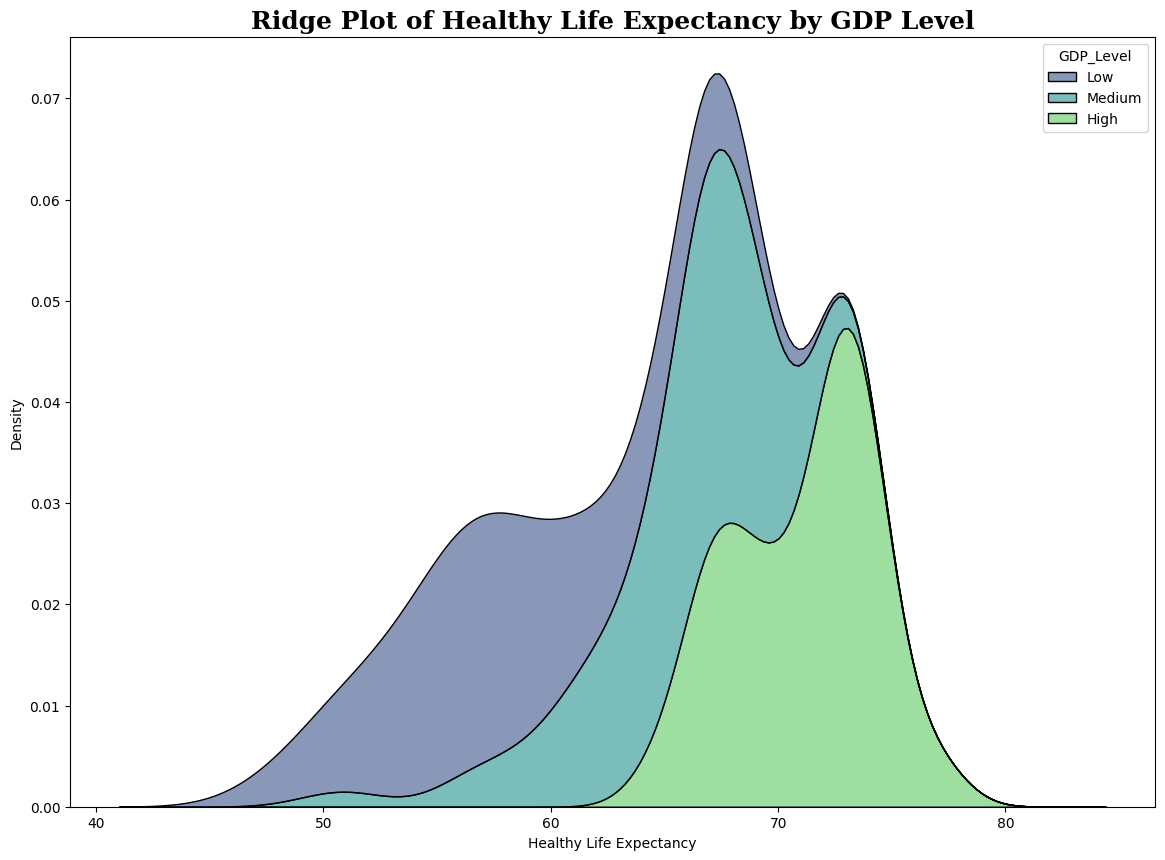

In [ ]:
# Ridge Plot for Healthy Life Expectancy (showing density for different ranges)
plt.figure(figsize=(14, 10))
sns.kdeplot(data=data, x='Healthy life expectancy', hue='GDP_Level', multiple="stack", palette="viridis", alpha=0.6)
plt.title("Ridge Plot of Healthy Life Expectancy by GDP Level", fontsize=18, weight='bold', family='Serif')
plt.xlabel("Healthy Life Expectancy")
plt.show()

**Ridge Plot Interpretation**
- The **ridge plot** shows **Healthy Life Expectancy** for countries categorized by **GDP level** (Low, Medium, High).
- **Countries with High GDP** levels tend to have a longer healthy life expectancy (mostly **70-80 years**), while **Low GDP** countries cluster around **50-60 years**.
- There is a clear **trend** that higher economic prosperity correlates with higher life expectancy, highlighting disparities in healthcare and living conditions between economically advantaged and disadvantaged regions.




##**2.3 Bivariate and Multivariate Analysis**
- Investigate relationships between Ladder Score and key features like Social Support, Generosity, and Healthy Life Expectancy.
- Create scatterplots, regression lines, and a pair plot to highlight relationships between features.

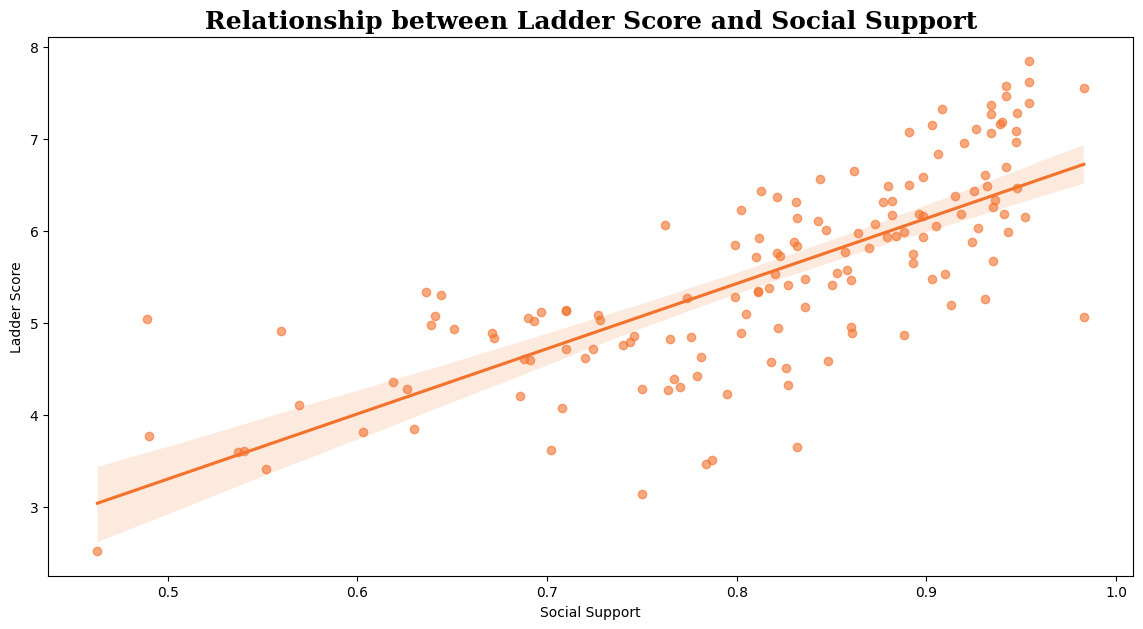

In [ ]:
# Scatterplot with Regression Line: Ladder Score vs Social Support
plt.figure(figsize=(14, 7))
sns.regplot(data=data, x='Social support', y='Ladder score', color="#f3722c", scatter_kws={'alpha':0.6})
plt.title("Relationship between Ladder Score and Social Support", fontsize=18, weight='bold', family='Serif')
plt.xlabel("Social Support")
plt.ylabel("Ladder Score")
plt.show()

**Scatter Plot with Regression line Interpretation**
- The scatterplot reveals a positive correlation between Social Support and Ladder Score.
- Countries with greater levels of social support generally exhibit higher happiness scores.
- The regression line emphasizes this trend, showing a linear positive relationship. This suggests that community support is an important factor in determining overall happiness.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

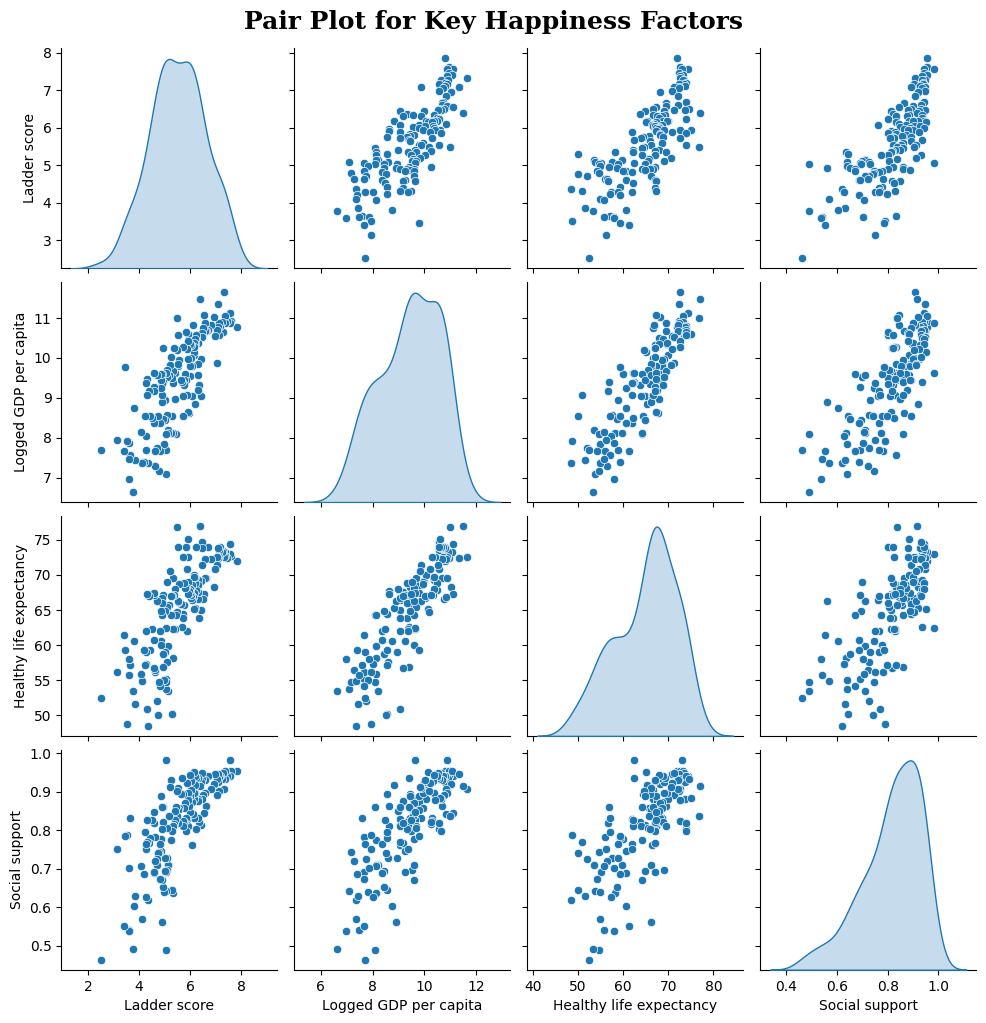

In [ ]:
# Pair Plot for Key Variables (Ladder Score, GDP, Life Expectancy, Social Support)
selected_features = data[['Ladder score', 'Logged GDP per capita', 'Healthy life expectancy', 'Social support']]
sns.pairplot(selected_features, diag_kind='kde', height=2.5, palette='deep')
plt.suptitle("Pair Plot for Key Happiness Factors", y=1.02, fontsize=18, weight='bold', family='Serif')
plt.show()

**Pair Plots Interpretation**
- The pair plot visualizes the relationships between key variables: Ladder Score, Logged GDP per Capita, Healthy Life Expectancy, and Social Support.
- Most of the scatterplots show positive relationships, indicating that higher GDP, better life expectancy, and increased social support are all related to higher happiness levels.
- The distribution plots along the diagonal provide insight into the individual feature distributions, which seem to be approximately normal for most variables.

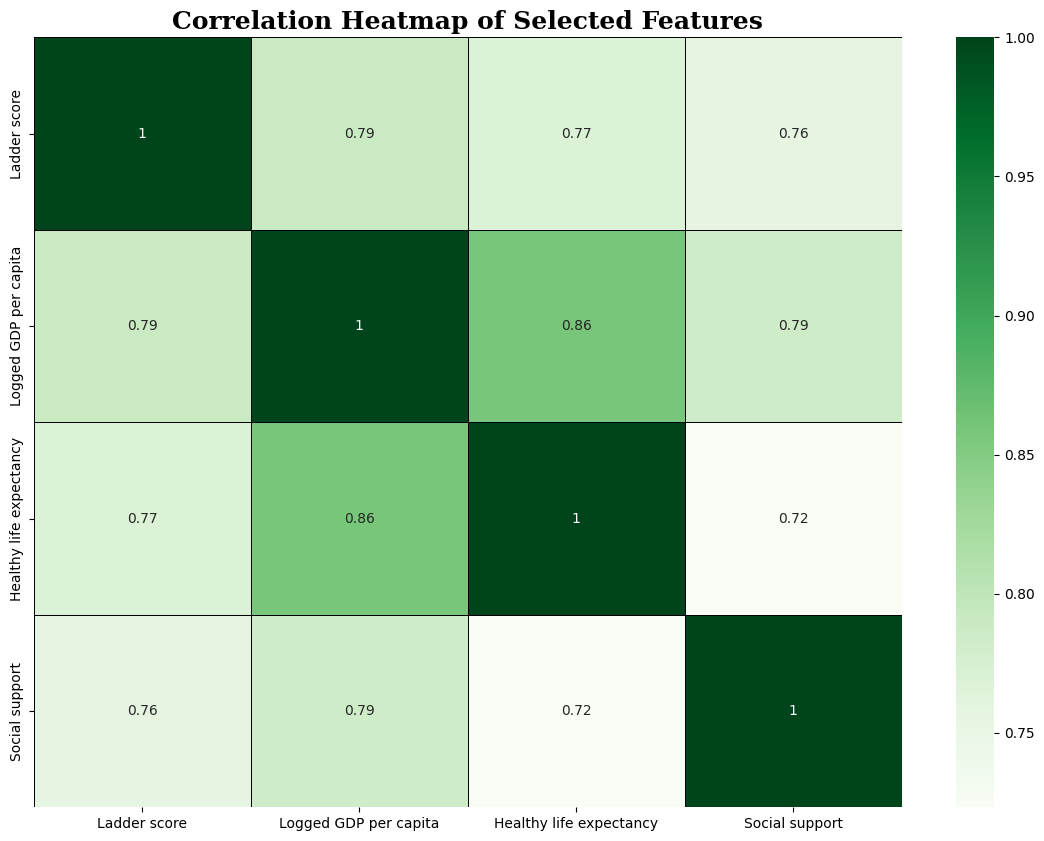

In [ ]:
# Heatmap of Correlation Between Features
plt.figure(figsize=(14, 10))
sns.heatmap(selected_features.corr(), annot=True, cmap='Greens', linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap of Selected Features", fontsize=18, weight='bold', family='Serif')
plt.show()


**Correlation Heatmap Interpretation**
- The heatmap provides an overview of correlations between key features: **Ladder Score, Logged GDP per Capita, Healthy Life Expectancy, and Social Support.**
- Ladder Score has strong positive correlations with:
  - **Logged GDP per Capita (0.79):**
  Indicates that wealthier countries tend to have higher happiness.
  - **Healthy Life Expectancy (0.77):**
  Suggests that good healthcare contributes significantly to happiness.
  - **Social Support (0.76):** Highlights the importance of social networks and community.
- GDP per Capita and Healthy Life Expectancy have the strongest correlation (0.86), emphasizing the close link between economic wealth and health outcomes.



---



**Key Insights & Observations from our EDA**


---



**Economic Wealth as a Happiness Driver**:
   - There is a strong relationship between **Logged GDP per Capita** and **Ladder Score**, indicating that economic prosperity plays a key role in overall happiness. Wealthier countries tend to have higher happiness scores.

2. **Health and Longevity Matter**:
   - Countries with **higher Healthy Life Expectancy** also tend to have higher happiness scores. This emphasizes that a longer, healthier life contributes significantly to a better perception of well-being.

3. **Social Support is Crucial**:
   - **Social Support** is highly correlated with **Ladder Score**. Countries with strong community support systems report higher happiness. The scatterplot demonstrates that a positive social environment directly influences perceived well-being.

4. **Regional Disparities**:
   - The **top 5 happiest countries** are all from **Western Europe**, indicating that these regions have the best quality of life, economic stability, social support, and healthcare.
   - **The bottom 5 countries**, primarily from **Sub-Saharan Africa and South Asia**, face significant challenges, such as low GDP, poor healthcare, and less social support, all contributing to lower happiness levels.

5. **Economic Influence on Life Expectancy**:
   - The **ridge plot** highlights that countries with higher GDP levels also experience greater **Healthy Life Expectancy**, underlining the disparity between regions with access to better healthcare and those without.

6. **Feature Relationships are Strong**:
   - The **pair plot** and **heatmap** reveal that most of the key variables are **positively correlated**, suggesting that improvements in **economic wealth, healthcare, and social structures** will collectively raise happiness scores.


#**Step 3: Machine Learning techniques**

##**3.1: Objective Formulation**
- **Objective:** Predict the `Ladder Score `(continuous value) for each country.
- The target variable is Ladder Score.
- We will explore both `Linear Regression` and `Random Forest Regressor` to compare their performances.

##**3.2: Data Splitting**
- Split the dataset into training and testing sets.
- Typically, we use an 80/20 split.

In [39]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Ladder score']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Step 3.3: Feature Selection**
We’ve selected features based on our EDA insights:
- Logged GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption




These features have been chosen because they showed strong correlations with the Ladder Score in our EDA.
## **Step 3.4: Model Implementation**
We will implement two regression models:

1. `Linear Regression.`
2. `Random Forest Regressor.`

**Model 1: Linear Regression**
- Linear Regression assumes a linear
relationship between the features and the target.
- It’s simple and interpretable, making it a good baseline.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr:.2f}")
print(f"Linear Regression R-squared: {r2_lr:.2f}")


Linear Regression MSE: 0.41
Linear Regression R-squared: 0.60


**Model 2: Random Forest Regressor**
- Random Forest is an ensemble model that uses multiple decision trees to provide more robust and accurate predictions.
- It can capture non-linear relationships better than linear regression.

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")


Random Forest MSE: 0.37
Random Forest R-squared: 0.64


## **Step 3.5: Model Evaluation**
We will evaluate both models using:
- **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values (lower is better).
- **R-squared (R²):** Represents the proportion of the variance in the target variable explained by the model (higher is better, range is from 0 to 1).

**Evaluation Metrics:**

**Linear Regression:**
- **MSE:** Measures the error in predictions.
- **R-squared:** Tells how well the linear model fits the data.

**Random Forest Regressor:**
- **MSE:** Typically lower than Linear Regression since the model captures non-linear relationships effectively.
-**R-squared:** Higher R² indicates a better fit compared to Linear Regression.



---



# **4. Interpretation and Insights**

#### Model Insights:
- **Key Predictors**:
  - `Logged GDP per capita`, `Social support`, and `Healthy life expectancy` are the strongest predictors of happiness, with correlations exceeding 0.75.
  - Features like `Generosity` and `Perceptions of corruption` have weaker correlations with `Ladder Score`, indicating a lesser impact.
- **Random Forest**:
  - Better performance (MSE: 0.37, R²: 0.64) suggests its ability to capture non-linear relationships.
  - Feature importance ranks `Logged GDP per capita` as the most impactful, followed by `Social support` and `Healthy life expectancy`.
- **Linear Regression**:
  - Performance is slightly weaker (MSE: 0.41, R²: 0.60), indicating a primarily linear relationship in the data.

#### Comparison Across Techniques:
- **Reliability**: Random Forest is more reliable due to its ability to handle non-linear interactions, as reflected in better metrics.
- **Feature Relationships**:
  - `GDP` and `Social support` are highly predictive, with Random Forest highlighting slight nuances in feature interactions that Linear Regression misses.

---

# **5. Recommendations and Further Analysis**

#### Policy Recommendations:
- Focus on improving **GDP per capita** and **social support systems**, as these significantly impact happiness.
- Enhance **healthcare policies** to improve life expectancy, which correlates strongly with happiness levels.

#### Future Directions:
- Include additional features like **mental health statistics** or **crime rates** for a more holistic understanding.
- Perform **time-series analysis** using happiness data from multiple years to explore trends and causal relationships.
- Consider datasets covering **cultural and environmental factors** to understand their influence on happiness.

